#### Verifying the path of the dataset

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data"))

['without_mask', 'with_mask']


#### Importing other Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten,Layer, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from keras import Model
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.models import Sequential
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [3]:
with_mask = os.listdir(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\with_mask")
print(with_mask[:5])
without_mask = os.listdir(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\without_mask")
print(without_mask[:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


#### Checking Sample Images

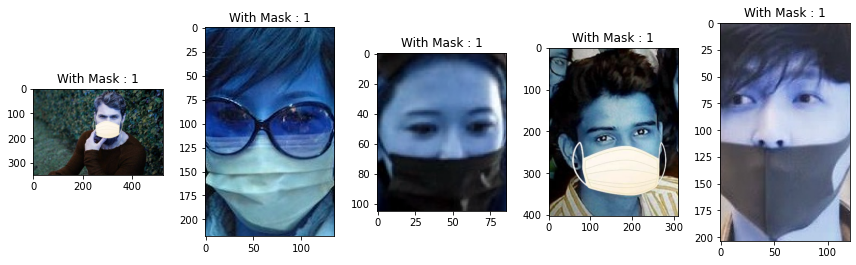

In [4]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = cv2.imread(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\with_mask" + "/" + with_mask[i])
    plt.imshow(img)
    plt.title("With Mask : 1")
    plt.tight_layout()

plt.show()

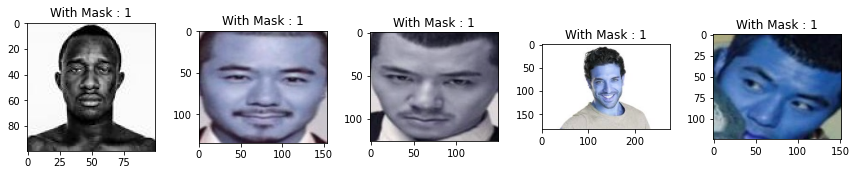

In [5]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1,5, i+1)
    img = cv2.imread(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\without_mask" + "/" + without_mask[i])
    plt.imshow(img)
    plt.title("With Mask : 1")
    plt.tight_layout()

plt.show()

#### Creating the Sample and Labels

In [6]:
X = []
y = []

for img in with_mask:
    try:
        img_read = cv2.imread(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\with_mask" + "/" + img)
        img_resize = cv2.resize(img_read, (224,224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(0)
    except:
        pass
    
for img in without_mask:
    try:
        img_read = cv2.imread(r"E:\Desktop_C\practice\Deep Learning\Face Mask Detection\data\without_mask" + "/" + img)
        img_resize = cv2.resize(img_read, (224,224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(1)
    except:
        pass

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

### Dividing the dataset in to train and test dataset

In [8]:
X_train = np.array(X_train) 
X_test = np.array(X_test)

In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
#normalizing the images 
X_train = X_train/255
X_test = X_test/255

In [11]:
#Verifying the shape of the Train and Test dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7175, 224, 224, 3) (7175,) (378, 224, 224, 3) (378,)


In [12]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [13]:
X_train[0].shape

(224, 224, 3)

In [14]:
y_train[200]

array([0., 1.], dtype=float32)

### Model Building

In [15]:
#initializing the model
model = Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (224,224,3)))
model.add(MaxPooling2D(2,2))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(16, (3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))

#Flattening 
model.add(Flatten())
#Adding dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense Layer of 8 neurons
model.add(Dense(8, activation='relu'))

#Output layer
model.add(Dense(2, activation='sigmoid'))

### Model Summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dropout (Dropout)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 3

### Model Compilation

In [17]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

### Training the model

In [18]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 100,  epochs = 10 )

Epoch 1/10
72/72 [==============================] - 549s 7s/step - loss: 0.6408 - accuracy: 0.6738 - val_loss: 0.5022 - val_accuracy: 0.8704
Epoch 2/10
72/72 [==============================] - 485s 7s/step - loss: 0.4663 - accuracy: 0.8728 - val_loss: 0.4701 - val_accuracy: 0.9101
Epoch 3/10
72/72 [==============================] - 373s 5s/step - loss: 0.4416 - accuracy: 0.8818 - val_loss: 0.4408 - val_accuracy: 0.9074
Epoch 4/10
72/72 [==============================] - 252s 4s/step - loss: 0.4022 - accuracy: 0.9067 - val_loss: 0.4174 - val_accuracy: 0.9153
Epoch 5/10
72/72 [==============================] - 299s 4s/step - loss: 0.3824 - accuracy: 0.9162 - val_loss: 0.4073 - val_accuracy: 0.9048
Epoch 6/10
72/72 [==============================] - 254s 4s/step - loss: 0.3555 - accuracy: 0.9211 - val_loss: 0.3946 - val_accuracy: 0.9206
Epoch 7/10
72/72 [==============================] - 261s 4s/step - loss: 0.3336 - accuracy: 0.9292 - val_loss: 0.3786 - val_accuracy: 0.9233
Epoch 8/10
72

### Model Evaluation

In [19]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 2s 166ms/step - loss: 0.3957 - accuracy: 0.8862


[0.3957013785839081, 0.8862434029579163]

#### plot the loss

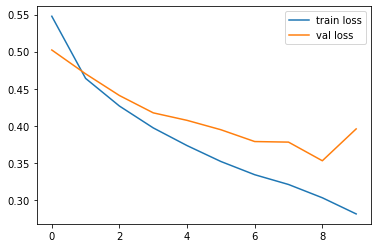

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig("loss vs Val_loss")

#### plot the accuracy

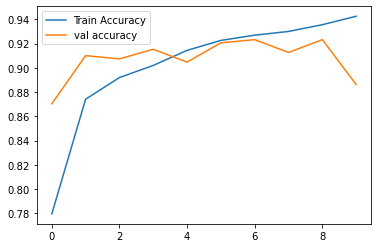

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label = "Train Accuracy")
plt.plot(r.history['val_accuracy'], label = "val accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy vs Validity accuracy")

In [22]:
from tensorflow.keras.models import load_model

model.save('model_face_mask_detection.h5')

In [23]:
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_face_mask_detection.h5')

In [25]:
img=image.load_img(r'E:\Desktop_C\practice\Deep Learning\Face Mask Detection\sample_dataset\with_mask\0007.jpg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[119.,  99.,  64.],
        [119.,  99.,  66.],
        [134., 110.,  82.],
        ...,
        [ 38.,  33.,  30.],
        [ 64.,  59.,  56.],
        [ 47.,  39.,  36.]],

       [[137., 120.,  77.],
        [138., 117.,  74.],
        [110.,  94.,  60.],
        ...,
        [ 38.,  33.,  30.],
        [ 55.,  51.,  48.],
        [ 48.,  44.,  41.]],

       [[ 58.,  51.,  33.],
        [ 60.,  50.,  41.],
        [ 60.,  60.,  50.],
        ...,
        [ 59.,  54.,  51.],
        [ 43.,  40.,  35.],
        [ 34.,  30.,  29.]],

       ...,

       [[ 20.,  20.,  22.],
        [ 19.,  19.,  21.],
        [ 41.,  44.,  51.],
        ...,
        [ 28.,  28.,  36.],
        [ 28.,  27.,  33.],
        [ 29.,  28.,  34.]],

       [[ 19.,  19.,  21.],
        [ 25.,  24.,  29.],
        [ 39.,  41.,  56.],
        ...,
        [ 27.,  26.,  32.],
        [ 27.,  26.,  31.],
        [ 27.,  26.,  31.]],

       [[ 20.,  20.,  22.],
        [ 33.,  34.,  39.],
        [ 29.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x

array([[[0.46666667, 0.3882353 , 0.2509804 ],
        [0.46666667, 0.3882353 , 0.25882354],
        [0.5254902 , 0.43137255, 0.32156864],
        ...,
        [0.14901961, 0.12941177, 0.11764706],
        [0.2509804 , 0.23137255, 0.21960784],
        [0.18431373, 0.15294118, 0.14117648]],

       [[0.5372549 , 0.47058824, 0.3019608 ],
        [0.5411765 , 0.45882353, 0.2901961 ],
        [0.43137255, 0.36862746, 0.23529412],
        ...,
        [0.14901961, 0.12941177, 0.11764706],
        [0.21568628, 0.2       , 0.1882353 ],
        [0.1882353 , 0.17254902, 0.16078432]],

       [[0.22745098, 0.2       , 0.12941177],
        [0.23529412, 0.19607843, 0.16078432],
        [0.23529412, 0.23529412, 0.19607843],
        ...,
        [0.23137255, 0.21176471, 0.2       ],
        [0.16862746, 0.15686275, 0.13725491],
        [0.13333334, 0.11764706, 0.11372549]],

       ...,

       [[0.07843138, 0.07843138, 0.08627451],
        [0.07450981, 0.07450981, 0.08235294],
        [0.16078432, 0

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.6576661 , 0.34133026]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
print(a)

[0]


In [34]:
a==1

array([False])